# Analysis + Modelling

In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
sns.set(style='white')

In [146]:
telecom_dist = pd.read_csv('telco.csv')

In [147]:
telecom_dist.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [148]:
telecom_dist.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [149]:
telecom_dist.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

Checking if there any missing values present or not

In [150]:
telecom_dist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [151]:

telecom_dist.TotalCharges = pd.to_numeric(telecom_dist.TotalCharges, errors='coerce')
telecom_dist.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

From the above, we identified that there are 11 missing values in TotalCharges

In [152]:
telecom_dist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [153]:
telecom_dist=telecom_dist.dropna()

df2 = telecom_dist.iloc[:,1:].copy()

df2['Churn']=df2['Churn'].map({'Yes':1, 'No':0})

df_dummies = pd.get_dummies(df2, drop_first=True)
df_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,False,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
1,0,34,56.95,1889.50,0,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,True,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
3,0,45,42.30,1840.75,0,True,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
4,0,2,70.70,151.65,1,False,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False


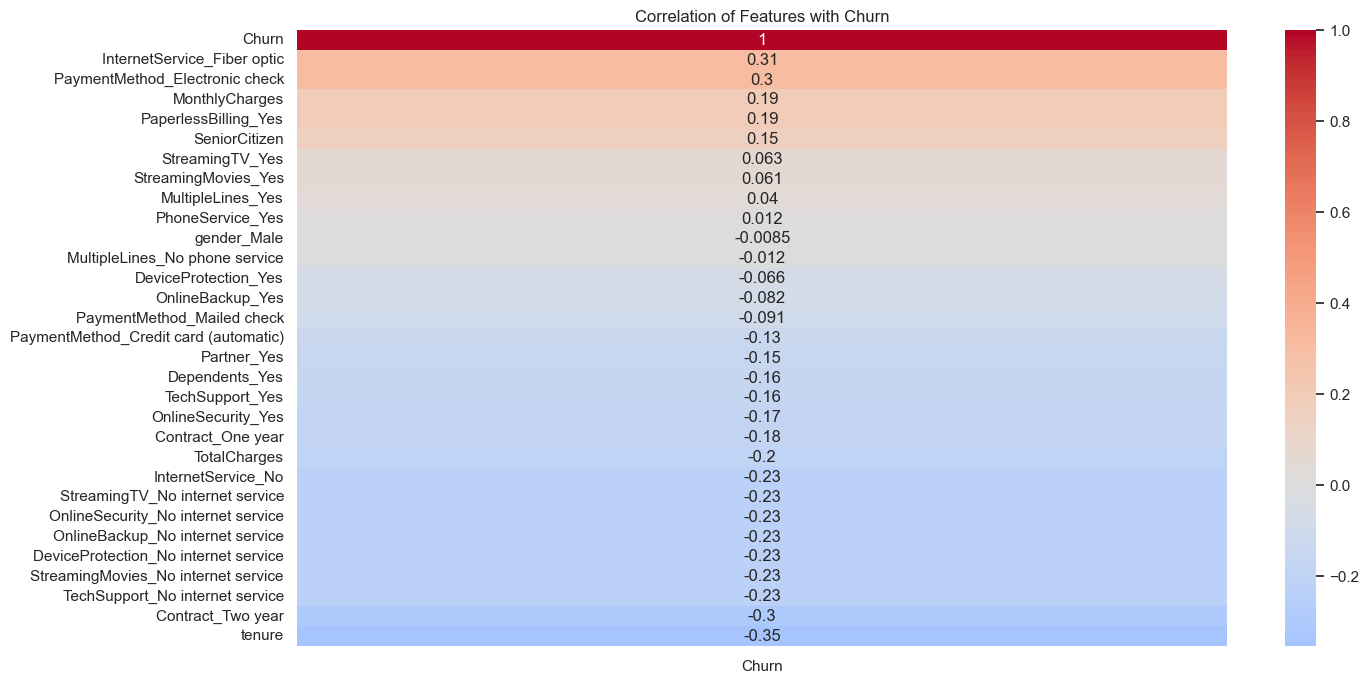

In [154]:
# Correlation for "Churn" with other variables
plt.figure(figsize=(15,8))
corr_churn = df_dummies.corr()[['Churn']].sort_values(by='Churn',ascending=False)
sns.heatmap(corr_churn, annot=True, cmap='coolwarm', center=0, cbar=True)
plt.title('Correlation of Features with Churn')
plt.show()

InternetService_Fiber optic, payment method by electronic check, Monthly charges seems to be positively correlated with Churn. While, Tenure, two year contract seem to be negatively correlated with Churn.

## Data Exploration 

***Exploring Demographic features***

1. **Gender Distribution**: About half of the customers in the dataset is male while the other half are female.

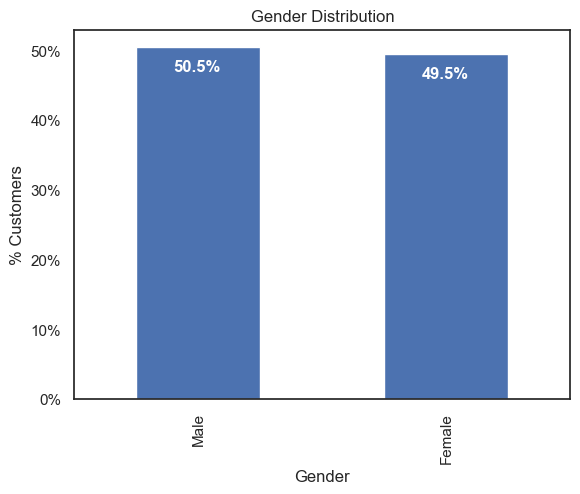

In [155]:
ax= (telecom_dist['gender'].value_counts()*100 / len(telecom_dist)).plot(kind='bar', stacked=True)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers')
ax.set_xlabel('Gender')
ax.set_title('Gender Distribution')

# creates a list to collected patches
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(
        i.get_x() + .15,
        i.get_height() - 3.5,
        f"{i.get_height():.1f}%",
        color='white',
        weight='bold'
    )

2. **% Senior Citizen**: About 16% of the customers are senior citizens. Thus most of the customers in the data are younger people.

Text(0.5, 0, '% of Senior Citizen')

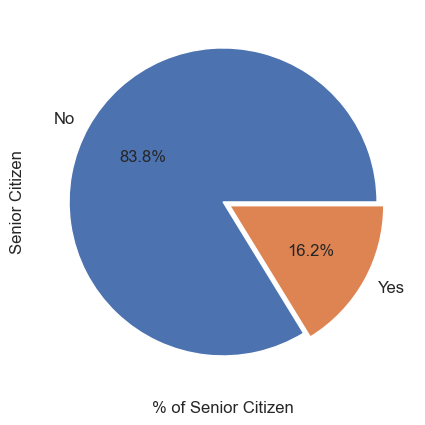

In [156]:
ax = (telecom_dist['SeniorCitizen'].value_counts()*100 / len(telecom_dist)).plot.pie(autopct='%.1f%%', labels=['No','Yes'], figsize=(6,5), fontsize=12, explode=(0,0.05))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('Senior Citizen', fontsize =12)
ax.set_xlabel('% of Senior Citizen', fontsize =12)

3. **Partener and Dependent status**: About 50% of the customers have partners, while only 30% of the total customers have dependents.

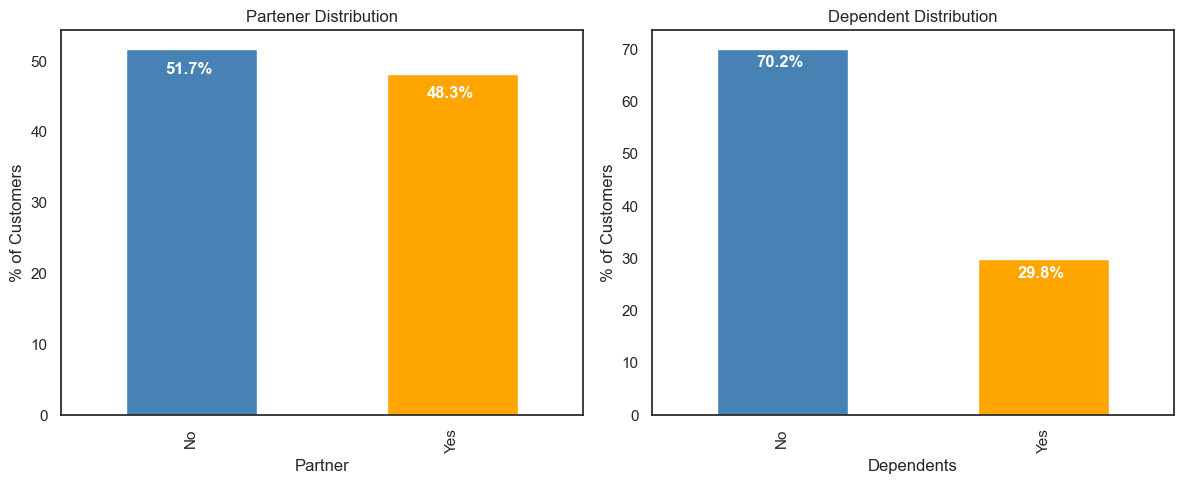

In [157]:
fig, axes = plt.subplots(1,2, figsize=(12,5))

partner_pct = telecom_dist['Partner'].value_counts(normalize=True) * 100
dependent_pct = telecom_dist['Dependents'].value_counts(normalize=True) * 100

# Partener distribution
partner_pct.plot(kind='bar', ax=axes[0], color=['steelblue','orange'])
axes[0].set_title('Partener Distribution')
axes[0].set_ylabel('% of Customers')
axes[0].set_xlabel('Partner')

# Dependent distribution
dependent_pct.plot(kind='bar', ax=axes[1], color=['steelblue', 'orange'])
axes[1].set_title('Dependent Distribution')
axes[1].set_ylabel('% of Customers')
axes[1].set_xlabel('Dependents')

# Add percentage labels
for ax in axes:
    for bar in ax.patches:
        ax.text(
            bar.get_x()+.15,
            bar.get_height()-3.5,
            f"{bar.get_height():.1f}%",
            color='white',
            weight='bold'
        )

plt.tight_layout()
plt.show()

**Correlation** indicates the direction of association, while the churn-rate plot quantifies the magnitude of churn difference, making the relationship easier to interpret for binary features like **Partner and Dependents**.

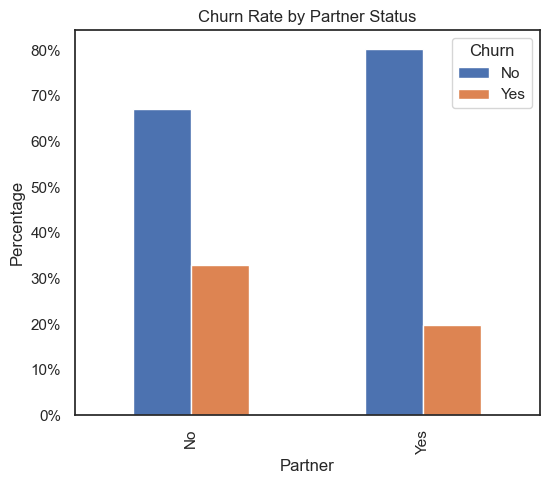

In [158]:
partner_churn = (
    pd.crosstab(
        telecom_dist['Partner'],
        telecom_dist['Churn'],
        normalize='index'
    ) * 100
)

ax = partner_churn.plot(kind='bar', figsize=(6,5))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

ax.set_title('Churn Rate by Partner Status')
ax.set_xlabel('Partner')
ax.set_ylabel('Percentage')
ax.legend(title='Churn')

plt.show()


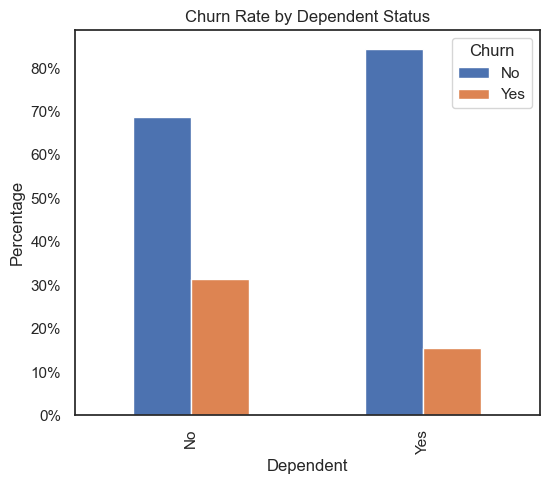

In [159]:
partner_churn = (
    pd.crosstab(
        telecom_dist['Dependents'],
        telecom_dist['Churn'],
        normalize='index'
    ) * 100
)

ax = partner_churn.plot(kind='bar', figsize=(6,5))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

ax.set_title('Churn Rate by Dependent Status')
ax.set_xlabel('Dependent')
ax.set_ylabel('Percentage')
ax.legend(title='Churn')

plt.show()


**Exploring Customer Account Information**

1. **Tenure**: The histogram shows that a large number of customers have a very short tenure (around one month), while a significant group has been with the company for a long time (up to 72 months). This suggests the presence of different types of customer contracts. Customers on short-term contracts find it easier to leave the service, whereas those on long-term contracts are more likely to stay, resulting in higher tenure.

Text(0.5, 1.0, '# of Customers by their tenure')

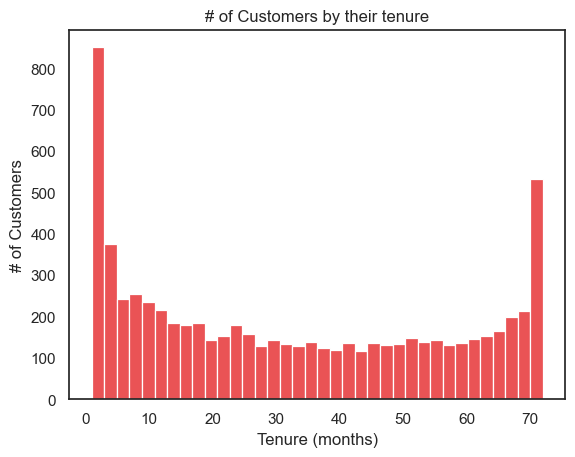

In [160]:
'''
Tenure is binned into approximately 5-month intervals to smooth the distribution
and highlight meaningful customer tenure patterns without excessive noise.
'''
colors=sns.color_palette('Paired')
ax = sns.histplot(telecom_dist['tenure'],  bins=int(180/5), color=colors[5])  
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('# of Customers by their tenure')

In [161]:
telecom_dist['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

2. **Contract**: For the better understanding of above graph lets look the # of customers by different Contract Type.

Text(0.5, 1.0, '# of Customers by Contract Type')

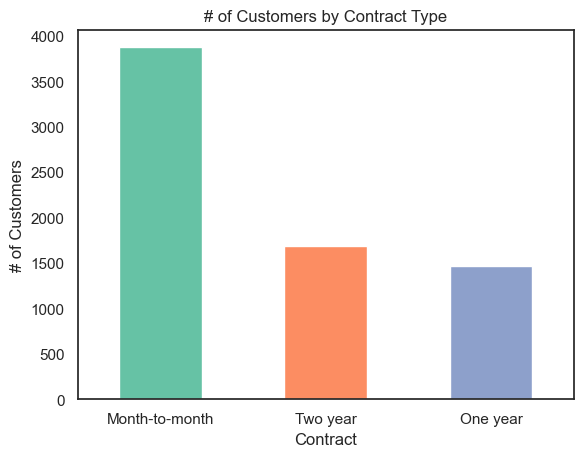

In [162]:
colors=sns.color_palette("Set2")
ax = telecom_dist['Contract'].value_counts().plot(kind='bar', rot=0, width=0.5, color=colors)
ax.set_ylabel('# of Customers')
ax.set_title('# of Customers by Contract Type')

As we can see from this graph, most of the customers are in the month-to-month contract. While there are an equal number of customers in one-year and two-year contracts.

Tenure of Customers based on the Contract Type

Text(0.5, 1.0, 'Two year Contract')

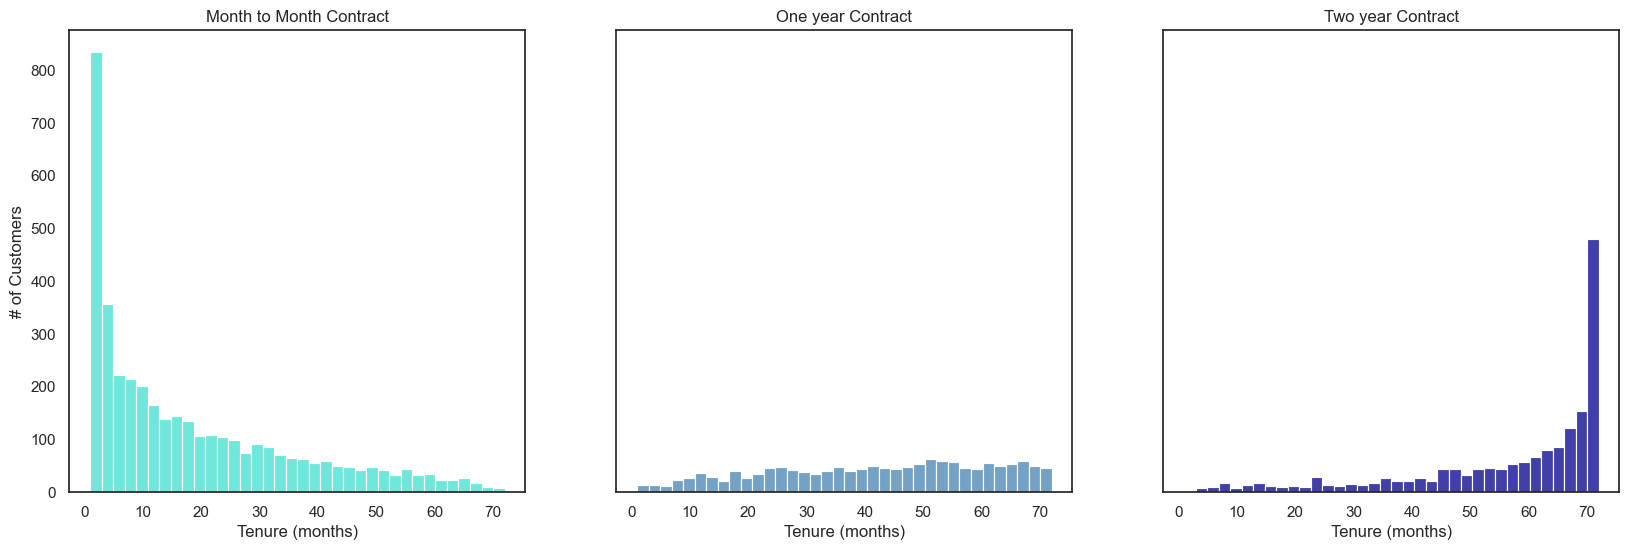

In [163]:
fig, (ax1, ax2, ax3)=plt.subplots(nrows=1,ncols=3, sharey=True, figsize=(20,6))

ax = sns.histplot(telecom_dist[telecom_dist['Contract']=='Month-to-month']['tenure'],
                 bins=int(180/5), color='turquoise',
                 ax=ax1)
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('Month to Month Contract')

ax = sns.histplot(telecom_dist[telecom_dist['Contract']=='One year']['tenure'],
                 bins=int(180/5), color='steelblue',
                 ax=ax2)
ax.set_xlabel('Tenure (months)')
ax.set_title('One year Contract')

ax = sns.histplot(telecom_dist[telecom_dist['Contract']=='Two year']['tenure'],
                 bins=int(180/5), color='darkblue',
                 ax=ax3)
ax.set_xlabel('Tenure (months)')
ax.set_title('Two year Contract')

Most of the Monthly Contracts last for 1-2 months, while the 2 year contracts tend to last for 70 months. This shows that the customers taking the longer contract are more loyal to the company and tends to stay with it for a longer period of time.

This is also we have seen earlier in the correlation chart with churn rate.

**Let's look on the distribution of various services used by customers.**

In [164]:
telecom_dist.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

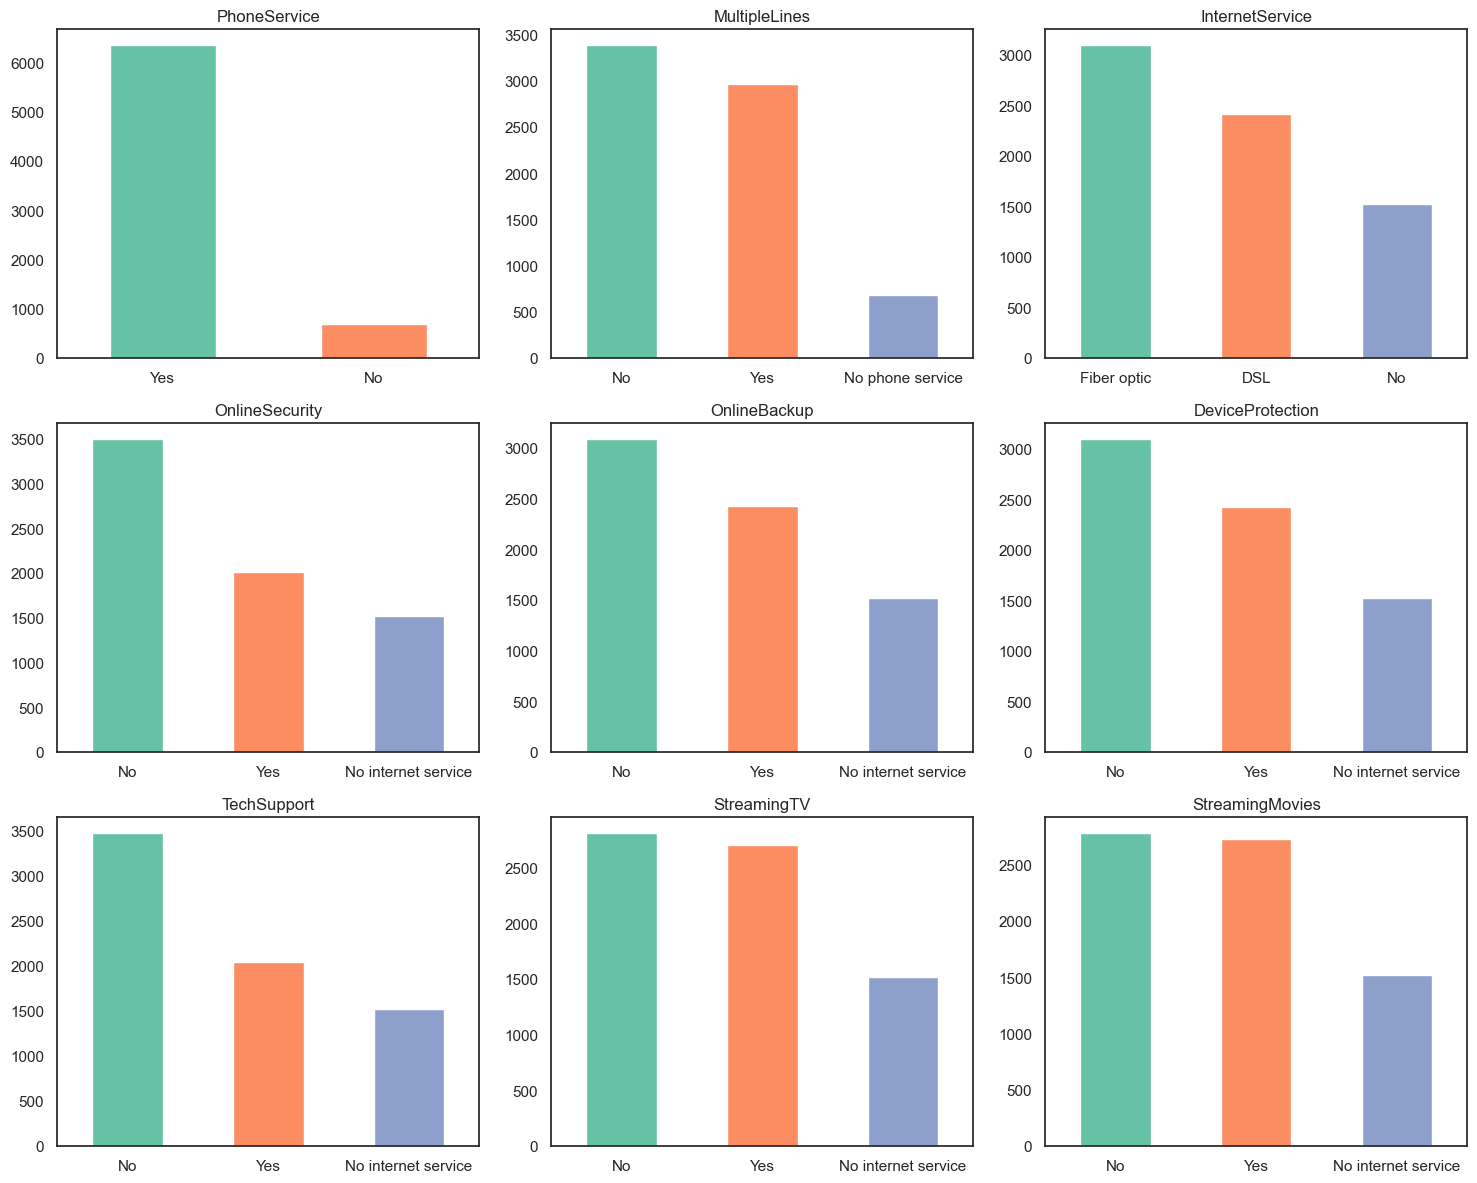

In [165]:
services = [
    'PhoneService','MultipleLines','InternetService',
    'OnlineSecurity','OnlineBackup','DeviceProtection',
    'TechSupport','StreamingTV','StreamingMovies'
]

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15,12))
cmap = plt.cm.Set2

for i, item in enumerate(services):
    row = i // 3
    col = i % 3

    colors = cmap(range(len(telecom_dist[item].value_counts())))

    ax = telecom_dist[item].value_counts().plot(
        kind='bar',
        ax=axes[row, col],
        rot=0,
        color=colors
    )
    
    ax.set_title(item)
    ax.set_xlabel('')
plt.tight_layout()

**Now let's look at the relation between monthly and total charges**

<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

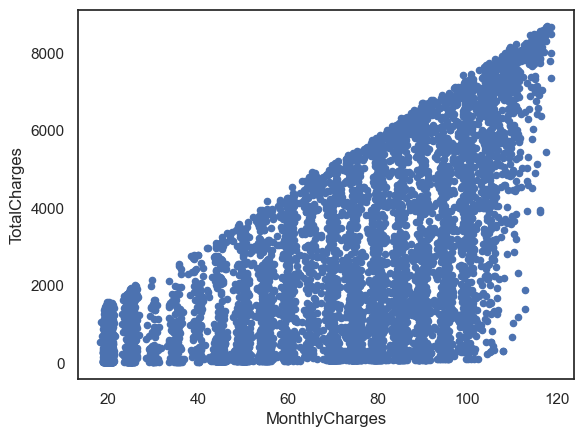

In [166]:
telecom_dist[['MonthlyCharges', 'TotalCharges']].plot.scatter(x='MonthlyCharges', y='TotalCharges')

We see that the total charges increase as the monthly bill for a customer increases

3. Finally, let's take a look at our predictive feature Churn 

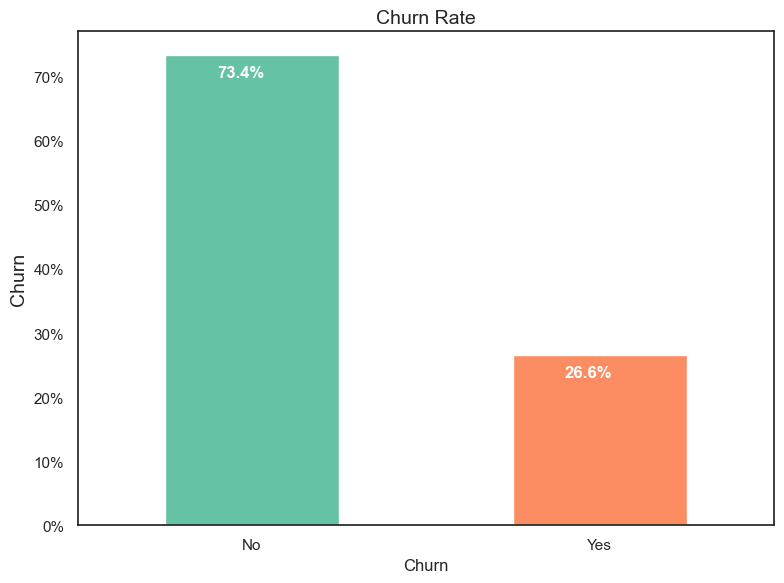

In [167]:
colors=sns.color_palette("Set2")
ax = (telecom_dist['Churn'].value_counts(normalize=True)*100).plot(kind='bar', stacked=True, rot=0, color=colors, figsize=(8,6))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% of customers', size=14)
ax.set_ylabel('Churn', size=14)
ax.set_title('Churn Rate', size=14)

# create a list to collect patches data
total = []

for i in ax.patches:
    totals.append(i.get_height())

total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(
        i.get_x() + .15,
        i.get_height() - 3.5,
        f"{i.get_height():.1f}%",
        color='white',
        weight='bold'
    )
    plt.tight_layout()

In our data, 74% of the customers do not churn. Clearly the data is skewed, as we would expect a large majority of the customers to not churn. This is important to keep in mind for our modelling, as skewness could lead to a lot of false negatives. We will see in the modelling section on how to avoid skewness in the data.

Let's see churn rate by tenure, seniority, contract type, monthly charges, and total charges to see how it varies 

1. **Churn Rate vs Tenure**: As we see from the below graph, the churn rate is highest during the initial months of customer tenure and decreases steadily as tenure increases. This indicates that new customers are more likely to churn, while long-tenure customers exhibit strong retention and loyalty. 

C:\Users\Admin\AppData\Local\Temp\ipykernel_7152\707080667.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  telecom_dist.groupby('tenure_bin')['Churn'].apply(lambda x: (x == 'Yes').mean()*100)


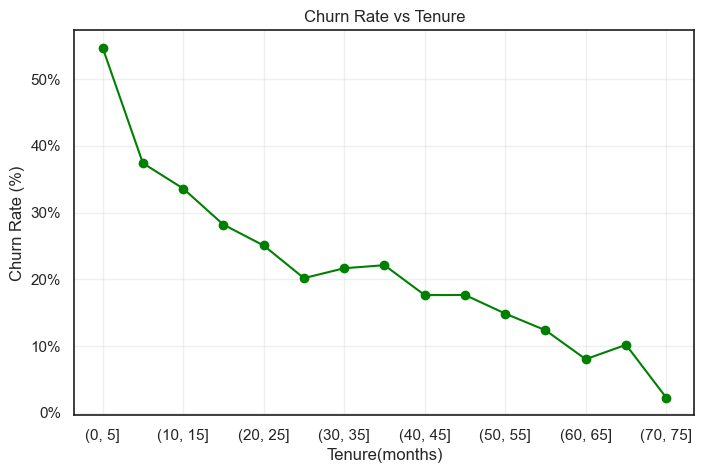

In [168]:
# Dividing tenure into fixed intervals (eg. 5 months bin)
telecom_dist['tenure_bin'] = pd.cut(
    telecom_dist['tenure'],
    bins=range(0,80,5)
)

# Compute churn rate per tenure bins
churn_by_tenure = (
    telecom_dist.groupby('tenure_bin')['Churn'].apply(lambda x: (x == 'Yes').mean()*100)
)

# Plot 
ax = churn_by_tenure.plot(
    kind='line',
    marker='o',
    figsize=(8,5),
    color='green'
)
ax.set_title('Churn Rate vs Tenure')
ax.set_xlabel('Tenure(months)')
ax.set_ylabel('Churn Rate (%)')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

plt.grid(alpha=0.3)
plt.show()

2. **Churn Rate by Contract**

   Customers on month-to-month contracts exhibit the highest churn rate due to lower switching barriers, while long-term contracts significantly improve customer retention by increasing commitment and switching costs.
   

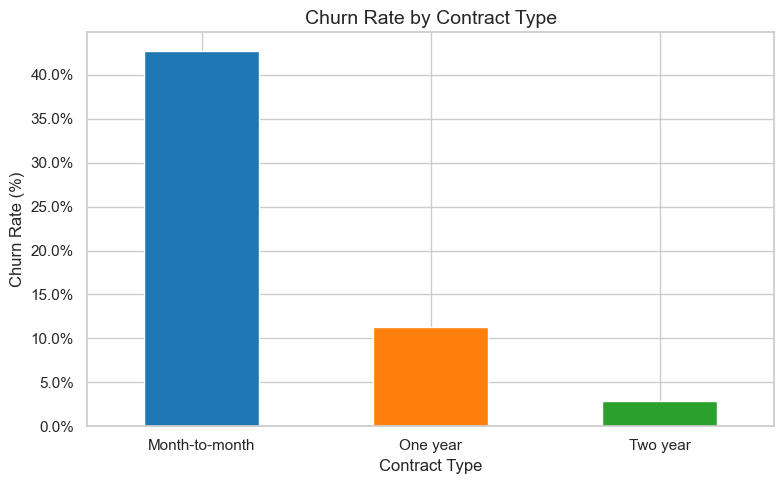

In [169]:
churn_by_contract = (
    telecom_dist.groupby('Contract')['Churn'].apply(lambda x: (x == 'Yes').mean()*100)
)

sns.set_style("whitegrid")
colors=sns.color_palette('tab10')

plt.figure(figsize=(7,5))
ax = churn_by_contract.plot(
    kind='bar',
    stacked=True,
    rot=0,
    figsize=(8,5),
    color=colors
)

ax.set_title('Churn Rate by Contract Type', fontsize=14)
ax.set_xlabel('Contract Type')
ax.set_ylabel('Churn Rate (%)')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())


plt.tight_layout()
plt.show()

3. **Churn Rate VS Seniority**

In [170]:
churn_by_contract

Contract
Month-to-month    42.709677
One year          11.277174
Two year           2.848665
Name: Churn, dtype: float64

Senior citizens exhibit a higher churn rate compared to non-senior customers, indicating the need for targeted retention strategies such as simplified plans, better support, or senior-friendly pricing.

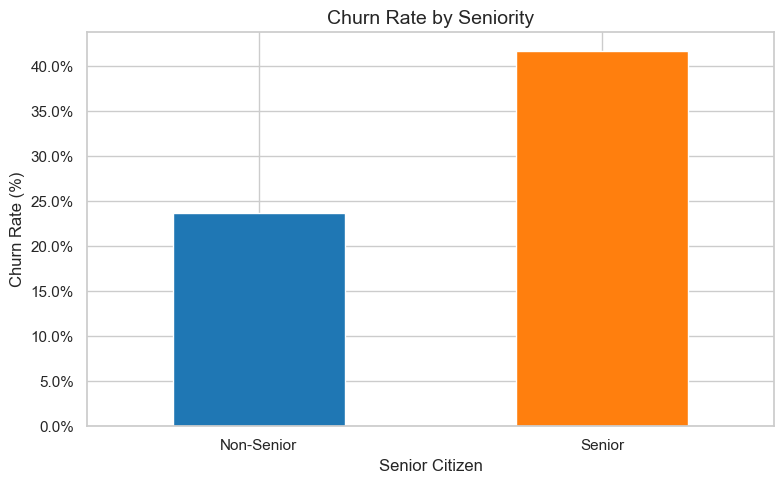

In [171]:
churn_by_contract = (
    telecom_dist.groupby('SeniorCitizen')['Churn'].apply(lambda x: (x == 'Yes').mean()*100)
)

sns.set_style("whitegrid")
colors=sns.color_palette('tab10')

plt.figure(figsize=(7,5))
ax = churn_by_contract.plot(
    kind='bar',
    stacked=True,
    rot=0,
    figsize=(8,5),
    color=colors
)

ax.set_title('Churn Rate by Seniority', fontsize=14)
ax.set_xlabel('Senior Citizen')
ax.set_ylabel('Churn Rate (%)')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

ax.set_xticklabels(['Non-Senior', 'Senior'])

plt.tight_layout()
plt.show()

In [172]:
telecom_dist['SeniorCitizen'].value_counts()

SeniorCitizen
0    5890
1    1142
Name: count, dtype: int64

4. **Churn VS MonthlyCharges**: Customers with higher monthly charges show a higher likelihood of churn, highlighting price sensitivity as a key churn driver.

Text(0.5, 1.0, 'Distribution of monthly charges by churn')

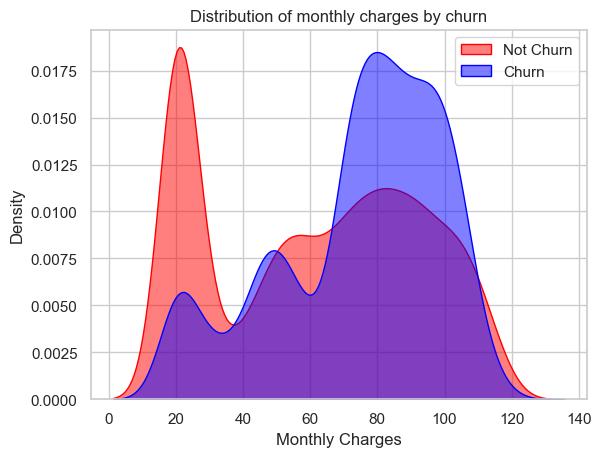

In [173]:
ax = sns.kdeplot(telecom_dist.MonthlyCharges[(telecom_dist["Churn"] == 'No') ],
                color="Red", fill = True, alpha=0.5)
ax = sns.kdeplot(telecom_dist.MonthlyCharges[(telecom_dist["Churn"] == 'Yes') ],
                ax =ax, color="Blue", fill= True, alpha=0.5)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of monthly charges by churn')

5. **Churn VS TotalCharges**: It seems there is higher Churn when the total charges are lower.

Text(0.5, 1.0, 'Distribution of Total charges by churn')

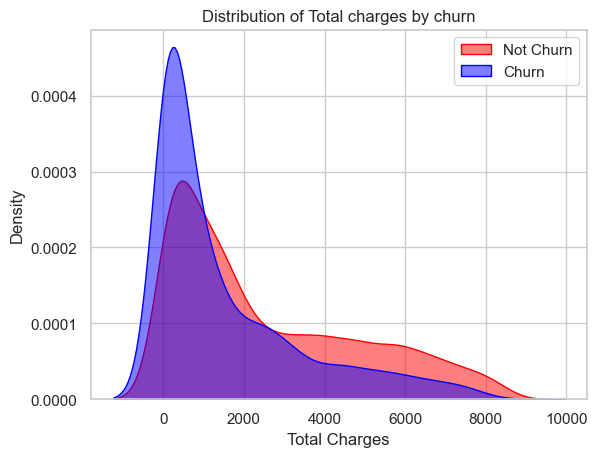

In [174]:
ax = sns.kdeplot(telecom_dist.TotalCharges[(telecom_dist["Churn"] == 'No') ],
                color="Red", fill = True, alpha=0.5)
ax = sns.kdeplot(telecom_dist.TotalCharges[(telecom_dist["Churn"] == 'Yes') ],
                ax =ax, color="Blue", fill= True, alpha=0.5)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Total Charges')
ax.set_title('Distribution of Total charges by churn')

6. **Churn Rate VS Internet Services**

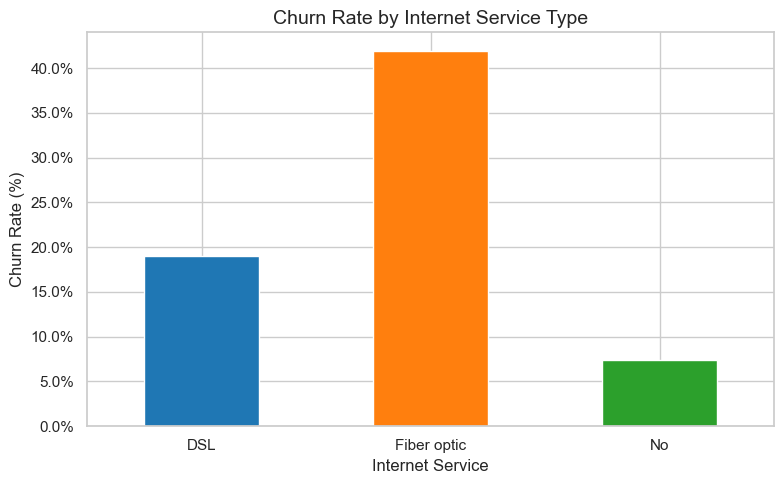

In [175]:
churn_by_internet = (
    telecom_dist.groupby('InternetService')['Churn'].apply(lambda x: (x == 'Yes').mean() * 100)
)

sns.set_style("whitegrid")
plt.figure(figsize=(7,5))
colors=sns.color_palette('tab10')

ax = churn_by_internet.plot(
    kind='bar',
    stacked=True,
    rot=0,
    figsize=(8,5),
    color=colors
)

ax.set_title('Churn Rate by Internet Service Type', fontsize=14)
ax.set_xlabel('Internet Service')
ax.set_ylabel('Churn Rate (%)')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())


plt.tight_layout()
plt.show()

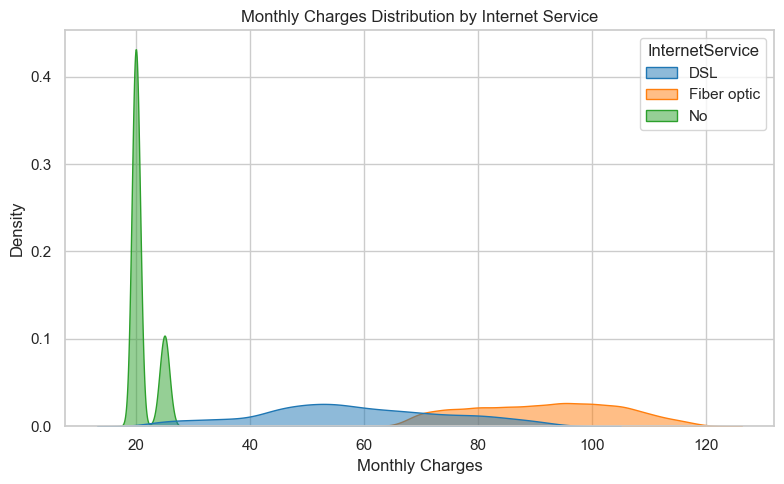

In [176]:
plt.figure(figsize=(8,5))

sns.kdeplot(
    data=telecom_dist,
    x='MonthlyCharges',
    hue='InternetService',
    fill=True,
    common_norm=False,
    palette='tab10',
    alpha=0.5
)

plt.title('Monthly Charges Distribution by Internet Service')
plt.xlabel('Monthly Charges')
plt.ylabel('Density')
plt.tight_layout()
plt.show()


## Creating and Evaluating the Predictive models

Let's see by creating some predictive models for the Telecom Churn Data and see who performs best. 

#### 1. Logistic Regression

In [177]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, recall_score, precision_score

# dependent and independent features
X = df_dummies.drop(columns=['Churn'])
y = df_dummies['Churn']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42,stratify=y)

# scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# model
model = LogisticRegression(class_weight='balanced', max_iter=1000)
model.fit(X_train_scaled, y_train)

# evaluate
y_pred = model.predict(X_test_scaled)

print(f"Accuracy: {accuracy_score(y_test,y_pred)}")
print(f"Recall: {recall_score(y_test, y_pred)}")
print(f"Precision: {precision_score(y_test, y_pred)}")
print(f"Classification Report:\n {classification_report(y_test, y_pred)}")

Accuracy: 0.7350710900473933
Recall: 0.7932263814616756
Precision: 0.5011261261261262
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.71      0.80      1549
           1       0.50      0.79      0.61       561

    accuracy                           0.74      2110
   macro avg       0.70      0.75      0.71      2110
weighted avg       0.80      0.74      0.75      2110



Axes(0.125,0.11;0.775x0.77)


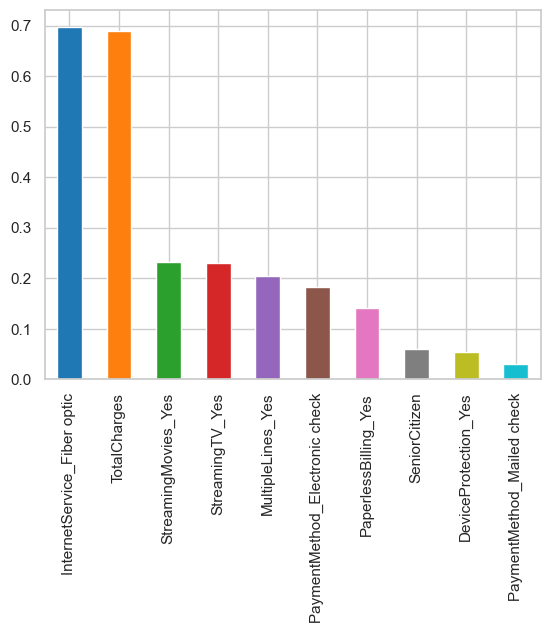

In [178]:
colors=sns.color_palette("tab10")
weights = pd.Series(model.coef_[0],
                 index=X.columns.values)
print (weights.sort_values(ascending = False)[:10].plot(kind='bar', color=colors))

Axes(0.125,0.11;0.775x0.77)


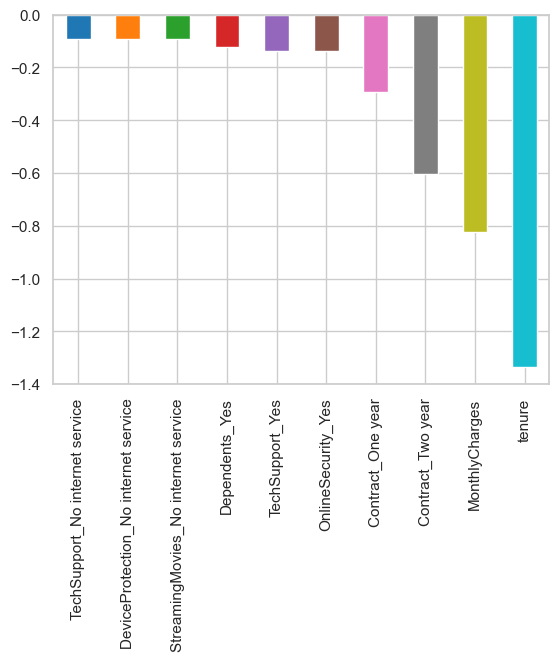

In [179]:
print (weights.sort_values(ascending = False)[-10:].plot(kind='bar', color=colors))

The logistic regression coefficients indicate that some features are negatively related to churn, while others are positively related. A negative relationship implies that the likelihood of churn decreases as the feature value increases, whereas a positive relationship indicates a higher probability of churn.

Key observations are summarized below:

- Customers with a two-year contract show the lowest likelihood of churn. Along with tenure, this feature has one of the strongest negative relationships with churn, confirming the patterns observed during EDA.

- Longer tenure significantly reduces the probability of churn, indicating that customer loyalty increases over time.

- Features such as higher total charges, month-to-month contracts, fibre-optic internet service, and senior citizen status are associated with a higher churn probability.
The relationship with fibre-optic service is particularly interesting, as despite offering faster internet speeds, it may lead to higher churn due to factors such as higher costs or service expectations.

#### 2. RandomForest

In [180]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = 'log2',
                                  max_leaf_nodes = 30, class_weight='balanced')
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test,y_pred)}")
print(f"Recall: {recall_score(y_test, y_pred)}")
print(f"Precision: {precision_score(y_test, y_pred)}")
print(f"Classification Report:\n {classification_report(y_test, y_pred)}")

Accuracy: 0.7464454976303317
Recall: 0.7807486631016043
Precision: 0.5152941176470588
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.73      0.81      1549
           1       0.52      0.78      0.62       561

    accuracy                           0.75      2110
   macro avg       0.71      0.76      0.72      2110
weighted avg       0.80      0.75      0.76      2110



<Axes: >

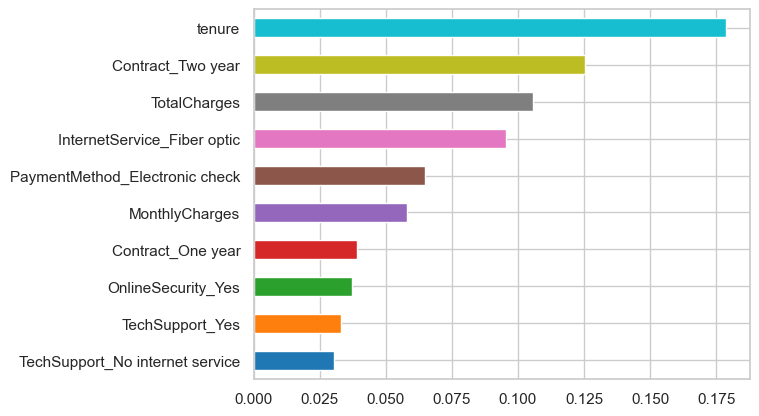

In [181]:
color=sns.color_palette('tab10')
importances = rf_model.feature_importances_
weights = pd.Series(importances,
                 index=X.columns.values)
weights.sort_values()[-10:].plot(kind = 'barh',color=color)

**Observation**:

- From the RandomForest algorithm, tenure, 2-year contract, and total charges are the most important features for predicting the churn.
  

In [182]:

from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,y_pred))  

[[1137  412]
 [ 123  438]]


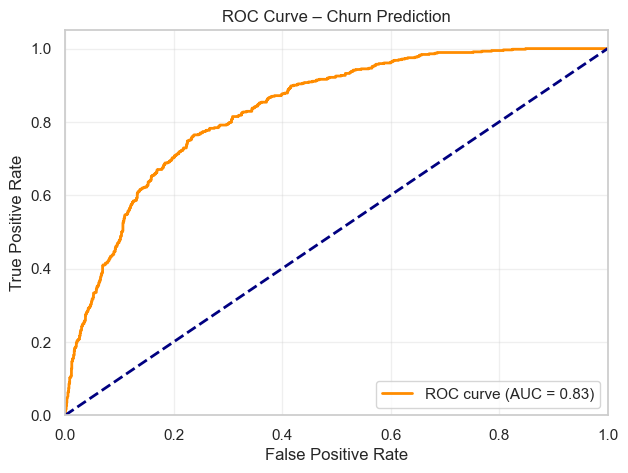

In [183]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_prob = rf_model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label=f'ROC curve (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve – Churn Prediction')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

In [184]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,y_pred))  

[[1137  412]
 [ 123  438]]


*ROC-AUC Curve*

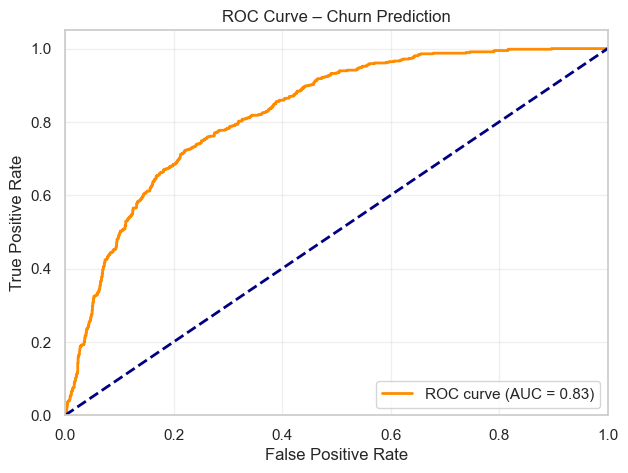

In [185]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_prob = svc_model.predict_proba(X_test_scaled)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label=f'ROC curve (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve – Churn Prediction')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()


#### 4. AdaBoost

In [186]:
from sklearn.ensemble import AdaBoostClassifier

ada_model = AdaBoostClassifier()
ada_model.fit(X_train, y_train)

y_pred = ada_model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test,y_pred)}")
print(f"Recall: {recall_score(y_test, y_pred)}")
print(f"Precision: {precision_score(y_test, y_pred)}")
print(f"Classification Report:\n {classification_report(y_test, y_pred)}")

Accuracy: 0.7928909952606635
Recall: 0.45098039215686275
Precision: 0.662303664921466
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.92      0.87      1549
           1       0.66      0.45      0.54       561

    accuracy                           0.79      2110
   macro avg       0.74      0.68      0.70      2110
weighted avg       0.78      0.79      0.78      2110



#### 5. XGBoost

In [187]:
from xgboost import XGBClassifier

scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum() 

xg_model = XGBClassifier(scale_pos_weight=scale_pos_weight,eval_metric='auc', objective='binary:logistic',random_state=42)
xg_model.fit(X_train, y_train)

y_pred = xg_model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test,y_pred)}")
print(f"Recall: {recall_score(y_test, y_pred)}")
print(f"Precision: {precision_score(y_test, y_pred)}")
print(f"Classification Report:\n {classification_report(y_test, y_pred)}")

Accuracy: 0.7630331753554502
Recall: 0.679144385026738
Precision: 0.543509272467903
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.79      0.83      1549
           1       0.54      0.68      0.60       561

    accuracy                           0.76      2110
   macro avg       0.71      0.74      0.72      2110
weighted avg       0.78      0.76      0.77      2110



In [188]:
print(confusion_matrix(y_test,y_pred))  

[[1229  320]
 [ 180  381]]


In [189]:
xg_model.predict_proba(X_test)[0]

array([0.9508874 , 0.04911259], dtype=float32)

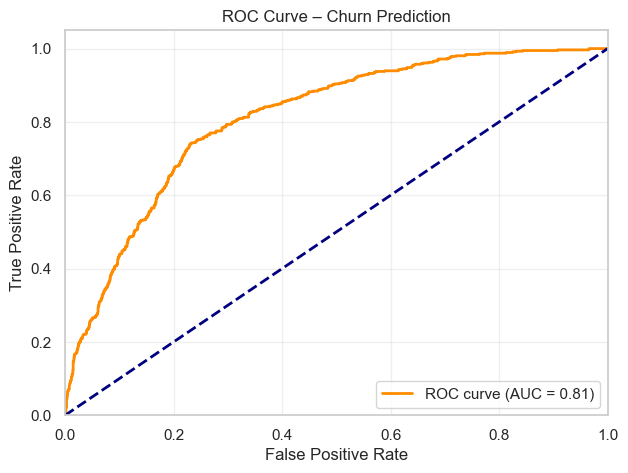

In [190]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_prob = xg_model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label=f'ROC curve (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve – Churn Prediction')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()


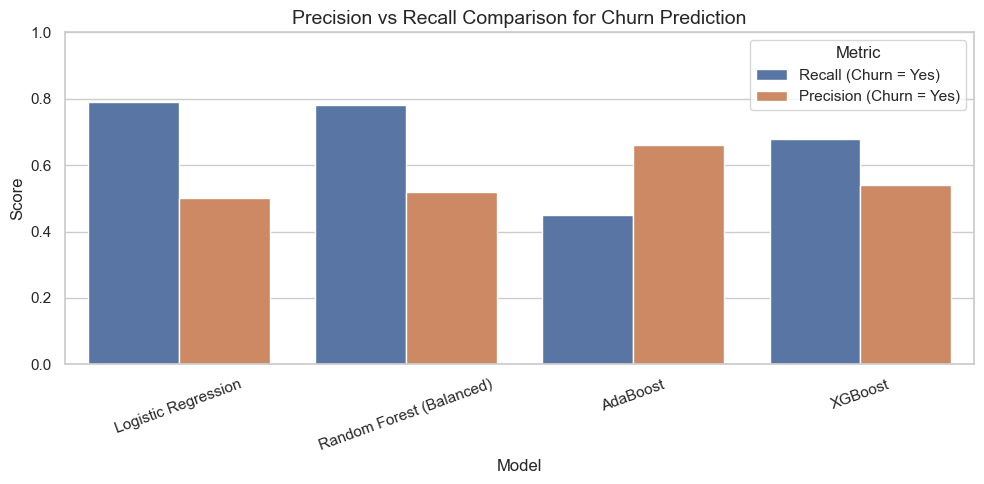

In [191]:
model_comparison = pd.DataFrame({
    "Model": [
        "Logistic Regression",
        "Random Forest (Balanced)",
        "AdaBoost",
        "XGBoost"
    ],
    "Recall (Churn = Yes)": [
        0.79,
        0.78,
        0.45,
        0.68
    ],
    "Precision (Churn = Yes)": [
        0.50,
        0.52,
        0.66,
        0.54
    ]
})
plot_df = model_comparison.melt(
    id_vars="Model",
    value_vars=["Recall (Churn = Yes)", "Precision (Churn = Yes)"],
    var_name="Metric",
    value_name="Score"
)
sns.set_style("whitegrid")
plt.figure(figsize=(10,5))

sns.barplot(
    data=plot_df,
    x="Model",
    y="Score",
    hue="Metric"
)

plt.title("Precision vs Recall Comparison for Churn Prediction", fontsize=14)
plt.ylabel("Score")
plt.ylim(0,1)
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()